# Data Fields
- datetime : hourly date + timestamp  
- season :  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday : whether the day is considered a holiday
- workingday : whether the day is neither a weekend nor holiday
- weather : 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : temperature in Celsius
- atemp : "feels like" temperature in Celsius
- humidity : relative humidity
- windspeed : wind speed
- casual : number of non-registered user rentals initiated
- registered : number of registered user rentals initiated
- count : number of total rentals

# Importing Library and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('train.csv')
df_train = pd.DataFrame(df_train)
df_train.head(3) 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# Data Informations

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_train.datetime = pd.to_datetime(df_train.datetime)
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
df_train['hour'] = df_train.datetime.dt.hour
df_train['day'] = df_train.datetime.dt.day
df_train['month'] =df_train.datetime.dt.month
df_train['year'] = df_train.datetime.dt.year

In [ ]:
# Dropping the columns that are not necessary
df_train.drop(['datetime', 'registered', 'casual'], axis = 1, inplace = True)
df_train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011


In [ ]:
df_train.season.value_counts() # here dominated season is summer and fall

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df_train.holiday.value_counts() # count high on not holiday

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df_train.workingday.value_counts() # count high on working days

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df_train.weather.value_counts() # count high in Clear, Few clouds, Partly cloudy, Partly cloudy

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df_train.hour.value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [ ]:
df_train.month.value_counts() 

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64

In [ ]:
## In each month how much cycle is counted or booked ? 

monthwise_meancount = df_train.groupby(['month'])['count'].mean()
monthwise_meancount

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

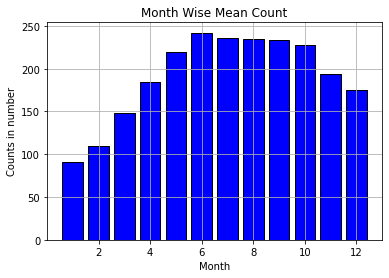

In [ ]:
# visualise the above cell -----
plt.bar(monthwise_meancount.index, monthwise_meancount.values, color='blue', edgecolor = 'black')
plt.title('Month Wise Mean Count')
plt.xlabel("Month")
plt.ylabel("Counts in number")
plt.grid()
plt.show()  # here from May to October is favorable for bike register

In [ ]:
df_train.groupby(['year'])['count'].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

# Data Correlation

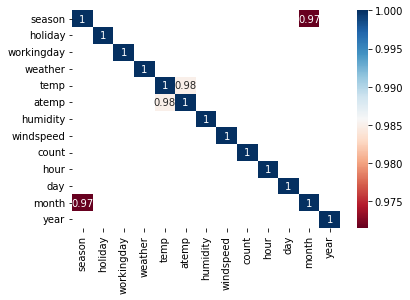

In [ ]:
corr = df_train.corr()
corr = corr[abs(corr)>=0.7] # returniing the correlation value greater than 0.7, so I will drop them
sns.heatmap(corr, annot = True, cmap='RdBu')
plt.show()

### **Inference**

In [ ]:
df_train1 = df_train.copy() # keeping a copy of the train dataset

In [ ]:
df_train.drop(['season', 'temp'], axis=1, inplace=True) # dropping season and temp column
df_train.columns

Index(['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df_train.shape

(10886, 11)

# Test Data Preparation
 - Same Operation on the test data as on train data
 - they are
  - remove datetime
  - make column of day, month, hour, year
  - correlation and dropping
  - finally check the shape with train data

In [ ]:
df_test = pd.read_csv('test.csv')
df_test = pd.DataFrame(df_test)
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [ ]:
df_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

In [ ]:
df_test['hour'] = df_test['datetime'].dt.hour
df_test['day'] = df_test['datetime'].dt.day
df_test['month'] = df_test['datetime'].dt.month
df_test['year'] = df_test['datetime'].dt.year
df_test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1,2011


In [ ]:
df_test.drop(['datetime'], axis =1 , inplace = True)

In [ ]:
df_test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df_test.drop(['temp', 'season'], axis=1, inplace = True)
df_test.columns

Index(['holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
       'hour', 'day', 'month', 'year'],
      dtype='object')

# Selecting Dependent and Independet feature in Training dataset

In [ ]:
df_train.head(2)

,holiday,workingday,weather,atemp,humidity,windspeed,count,hour,day,month,year
0,0,0,1,14.395,81,0.0,16,0,1,1,2011
1,0,0,1,13.635,80,0.0,40,1,1,1,2011


In [ ]:
x_train = df_train.drop(['count'], axis =1)
y_train = df_train['count']

In [ ]:
print(x_train)
print(y_train)

       holiday  workingday  weather   atemp  humidity  windspeed  hour  day  \
0            0           0        1  14.395        81     0.0000     0    1   
1            0           0        1  13.635        80     0.0000     1    1   
2            0           0        1  13.635        80     0.0000     2    1   
3            0           0        1  14.395        75     0.0000     3    1   
4            0           0        1  14.395        75     0.0000     4    1   
...        ...         ...      ...     ...       ...        ...   ...  ...   
10881        0           1        1  19.695        50    26.0027    19   19   
10882        0           1        1  17.425        57    15.0013    20   19   
10883        0           1        1  15.910        61    15.0013    21   19   
10884        0           1        1  17.425        61     6.0032    22   19   
10885        0           1        1  16.665        66     8.9981    23   19   

       month  year  
0          1  2011  
1        

In [ ]:
#@title train test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 14)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(8164, 10)
(8164,)
(2722, 10)
(2722,)


# ML modeling and Evaluation

In [ ]:
#@title Importing metrics library
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#@title Model Evaluation Functions

def mscore(model):
  print(f"Training R2 Score is : {model.score(X_train, Y_train)}")
  print("Testing R2 score is :", model.score(X_test, Y_test))


def model_metrics_checker(ytest, ypred):    #ytest and ypred are just the parameters
  MAE = mean_absolute_error(ytest, ypred)
  MSE = mean_squared_error(ytest, ypred)
  RMSE = np.sqrt(MSE)
  
  print("Mean Squared Error :", MSE)
  print("Mean Absolute Error :", MAE)
  print("Root Mean Squared Error :", RMSE)


def reg_coef_intercept(model):
  coeff = model.coef_
  intercept = model.intercept_

  print("coefficient :", coeff)
  print("Intercept : ", intercept)

# def my_single_regressor(x):                  # my own single regressor
#   prediction = ((reg_coef_intercept.coeff*x) + reg_coef_intercept.intercept)


In [ ]:
#@title Building models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

lin_reg_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors = 10)
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=0.1)




#### Lin_reg_model (Linear Regressor Model)

In [ ]:
lin_reg_model.fit(X_train, Y_train)

Y_pred_lin = lin_reg_model.predict(X_test)    # prediction

mscore(lin_reg_model)
model_metrics_checker(Y_test, Y_pred_lin)

Training R2 Score is : 0.3903319129439041
Testing R2 score is : 0.3832255173371527
Mean Squared Error : 19089.03540539335
Mean Absolute Error : 104.82917986158176
Root Mean Squared Error : 138.16307540509277


In [ ]:
#@title KNN Model

knn_model = KNeighborsRegressor(n_neighbors = 10)
knn_model.fit(X_train, Y_train)

Y_pred_knn = knn_model.predict(X_test)    # prediction

mscore(knn_model)
model_metrics_checker(Y_test, Y_pred_knn)

Training R2 Score is : 0.6101295905675062
Testing R2 score is : 0.5372980773705092
Mean Squared Error : 14320.523354151359
Mean Absolute Error : 85.03096987509184
Root Mean Squared Error : 119.66838911822687


In [ ]:
#@title KNN Calibration
knn_model = KNeighborsRegressor(n_neighbors = 6)
knn_model.fit(X_train, Y_train)

Y_pred_knn = knn_model.predict(X_test)    # prediction

mscore(knn_model)
model_metrics_checker(Y_test, Y_pred_knn)

Training R2 Score is : 0.6645881904362261
Testing R2 score is : 0.5418604049847014
Mean Squared Error : 14179.320311862193
Mean Absolute Error : 82.5878030859662
Root Mean Squared Error : 119.0769512200501


In [ ]:
#@title Lasso Model
lasso_model.fit(X_train, Y_train)

Y_pred_lasso = lasso_model.predict(X_test)    # prediction

mscore(lasso_model)
model_metrics_checker(Y_test, Y_pred_lasso)

Training R2 Score is : 0.37740212635325854
Testing R2 score is : 0.3785913847351712
Mean Squared Error : 19232.460796357314
Mean Absolute Error : 104.07370651326278
Root Mean Squared Error : 138.68114794865707


In [ ]:
#@title Ridge Model
ridge_model.fit(X_train, Y_train)

Y_pred_ridge = ridge_model.predict(X_test)    # prediction

mscore(ridge_model)
model_metrics_checker(Y_test, Y_pred_ridge)

Training R2 Score is : 0.390331912795593
Testing R2 score is : 0.3832264617315061
Mean Squared Error : 19089.006176594572
Mean Absolute Error : 104.82896234407808
Root Mean Squared Error : 138.1629696286041


As we can see Knn works better. So further proceding with KNN Model.

In [ ]:
#@title Applying best model for the test[KNN Regressor]

test_Y_pred = knn_model.predict(df_test)
test_Y_pred.shape

(6493,)

In [ ]:
#@title generating the predicted csv

df_test['Count_pred'] = test_Y_pred

df_test.head(2)

df_test.to_csv("Bike rental prediction.csv")